<a href="https://colab.research.google.com/github/ameenmuhammad-693/01-class-1-AI-for-everyone/blob/main/Lecture_7_Odometry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[ 0.       0.01     0.02    ...  9.98     9.99    10.     ]
 [ 5.       4.99902  4.99706 ...  4.86672  4.8824   4.8971 ]
 [-0.098   -0.196   -0.294   ...  1.568    1.47     1.372  ]]


Text(0, 0.5, 'Position(m)')

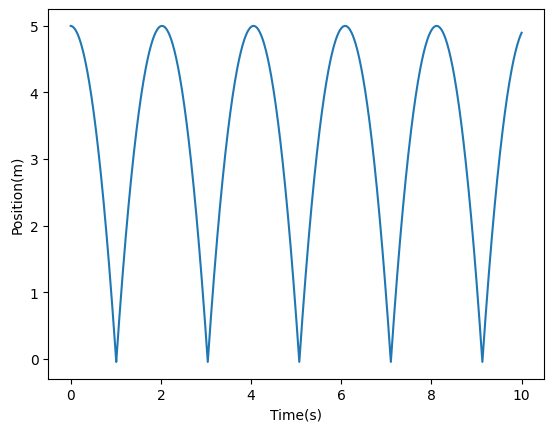

In [11]:
import matplotlib.pyplot as plt
import numpy as np

g = -9.8
y = 5
v = 0
t = 0
dt = 0.01
y_floor = 0
data = []

while t < 10:
    y += v * dt
    if y > y_floor:
      v += g*dt
    else:
      v = -v
    data.append([t, y, v])
    t += dt
data = np.array(data).transpose()
print(data)
plt.plot(data[0], data[1])
plt.xlabel("Time(s)")
plt.ylabel("Position(m)")


In [2]:
""" Practical Exercise:
Considering a differential drive robot with a distance between wheels of 0.1 m and a
wheel radius of 0.05m. Plot the evolution of the position of the robot over time when
the right wheel has an angular speed of 2rad/s and the left wheel has an angular
speed of 1 rad/s.
Note that the initial configuration of the robot is (0,0,0)"""


' Practical Exercise:\nConsidering a differential drive robot with a distance between wheels of 0.1 m and a\nwheel radius of 0.05m. Plot the evolution of the position of the robot over time when\nthe right wheel has an angular speed of 2rad/s and the left wheel has an angular\nspeed of 1 rad/s.\nNote that the initial configuration of the robot is (0,0,0)'

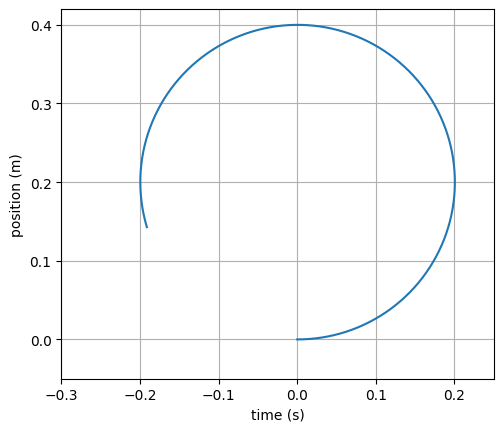

In [11]:
import matplotlib.pyplot as plt
import numpy as np
Wr = 0.05
Wd = 0.1
LWS = 1
RWS = 2
t = 0
dt = 0.01
data_t = [0]
data_x = [0]
data_y = [0]
data_theta = [0]
while t < 10:
  x_dot = Wr/2*np.cos(data_theta[-1])*RWS+Wd/2*np.cos(data_theta[-1])*LWS
  y_dot = Wr/2*np.sin(data_theta[-1])*RWS+Wd/2*np.sin(data_theta[-1])*LWS
  theta_dot = (Wr/Wd)*RWS-(Wr/Wd)*LWS
  t += dt
  data_t.append(t)
  data_x.append(data_x[-1]+x_dot*dt)
  data_y.append(data_y[-1]+y_dot*dt)
  data_theta.append(data_theta[-1]+theta_dot*dt)
fig, ax = plt.subplots() # Create a figure and an Axes object
ax.plot(data_x, data_y) # Plot the data on the Axes
ax.set_xlabel("time (s)") # Set the x-label
ax.set_ylabel("position (m)")
ax.set_xlim([-0.3, 0.25])
ax.set_ylim([-0.05, 0.42])
plt.gca().set_aspect('equal')
plt.grid()
plt.show()


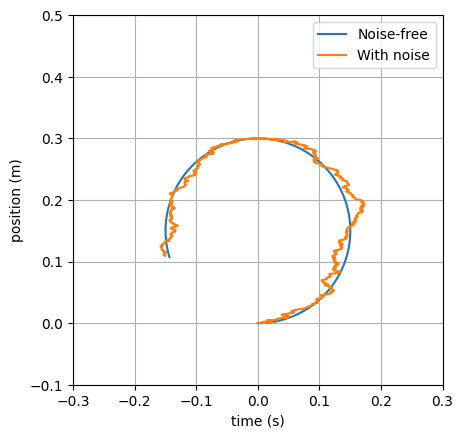

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Robot parameters
Wr = 0.05
Wd = 0.1
RWS = 2
LWS = 1
dt = 0.01
t = 0

# Noise-free data
data_x = [0]
data_y = [0]
data_theta = [0]

# Noisy data
data_x_N = [0]
data_y_N = [0]
data_theta_N = [0]

# Simulation loop
while t < 10:
    # Noise-free velocities
    x_dot = Wr/2*np.cos(data_theta[-1])*RWS + Wr/2*np.cos(data_theta[-1])*LWS
    y_dot = Wr/2*np.sin(data_theta[-1])*RWS + Wr/2*np.sin(data_theta[-1])*LWS
    theta_dot = Wr/Wd*(RWS - LWS)

    t += dt
    data_x.append(data_x[-1]+x_dot*dt)
    data_y.append(data_y[-1]+y_dot*dt)
    data_theta.append(data_theta[-1]+theta_dot*dt)

    # Noisy velocities
    x_dot_N = Wr/2*np.cos(data_theta_N[-1])*RWS + Wr/2*np.cos(data_theta_N[-1])*LWS + np.random.normal(0,0.2)
    y_dot_N = Wr/2*np.sin(data_theta_N[-1])*RWS + Wr/2*np.sin(data_theta_N[-1])*LWS + np.random.normal(0,0.02)
    theta_dot_N = Wr/Wd*(RWS - LWS) + np.random.normal(0,0.01)

    data_x_N.append(data_x_N[-1]+x_dot_N*dt)
    data_y_N.append(data_y_N[-1]+y_dot_N*dt)
    data_theta_N.append(data_theta_N[-1]+theta_dot_N*dt)


fig, ax = plt.subplots() # Create a figure and an Axes object
ax.plot(data_x, data_y,label='Noise-free') # Plot the data on the Axes
ax.plot(data_x_N, data_y_N,label='With noise') # Plot the data on the Axes
ax.set_xlabel("time (s)") # Set the x-label
ax.set_ylabel("position (m)")
ax.set_xlim([-0.3, 0.3])
ax.set_ylim([-0.1, 0.5])
ax.legend()
plt.gca().set_aspect('equal')
plt.grid()
plt.show()